<a href="https://colab.research.google.com/github/raflinoob132/MachineLearning-1/blob/main/Week%201/HeartDisease/CollabNotebook/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
# Install mglearn jika belum terinstall
#!pip install mglearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, classification_report
)
import mglearn

In [59]:
# Load dataset
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/01.%20Machine%20Learning/01.%20Week%201/Dataset/HeartDisease.csv"
df = pd.read_csv(url)

# Hapus baris dengan nilai NaN
df = df.dropna()

# Pisahkan fitur (X) dan target (y). Disini saya pakai tabel exang sebagai target karena di soal tidak diberi tahu
X = df.drop('exang', axis=1)
y = df['exang']

# Bagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi data (penting untuk konvergensi Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
# Buat model Logistic Regression dengan solver yang cocok
model = LogisticRegression(max_iter=5000, solver='liblinear', random_state=42)
model.fit(X_train_scaled, y_train)

# Prediksi probabilitas dan kelas
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probabilitas kelas positif

Akurasi: 0.83
Presisi: 0.83
Recall: 0.83
F1-Score: 0.83
AUC-ROC: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        46
           1       0.64      0.64      0.64        14

    accuracy                           0.83        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.83      0.83      0.83        60

Confusion Matrix:
[[41  5]
 [ 5  9]]


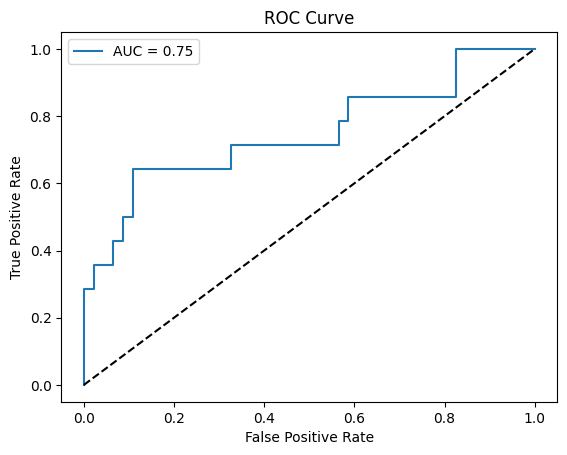

In [61]:
# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, y_pred_proba)

# Tampilkan hasil
print(f"Akurasi: {accuracy:.2f}")
print(f"Presisi: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC-ROC: {auc:.2f}\n")

# Classification Report dan Confusion Matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()